In [19]:
using Plots
using SpecialFunctions
using LaTeXStrings
using Printf

In [20]:
deltaprimeTF(Q, U) = (π * Q^(5/4) * (-2 + Q^3 * U^2) * gamma((1/4) * (3 + Q^(5/2) * U)) ) /
( (-1 + Q^(5/2) * U) * gamma((1/4) * (1 + Q^(5/2) * U)))

deltaprimeTF (generic function with 1 method)

In [21]:
deltaprimeCoppi(Q) = Q^(5/4)*(-π/8)*gamma((1/4)*(Q^(3/2) - 1)) / gamma((1/4)*(Q^(3/2) + 5));

In [22]:
# Use the GR backend for performance
gr()

# Define parameters
# S = 1000

# Define logarithmically spaced grid for Q and U
Qvals = 10 .^ LinRange(-4, 4, 2_000)  # Q spans from 10^-4 to 10^0
# Qvals_SM = 10 .^ LinRange(-4, 4, 2_000) # Q values for Single Mode (SM) case where Δ' ∝ Q^(5/4) w/out bound

Uvals = LinRange(0, 4, 2_000)   # U spans from 10^0 to 10^4

# Create matrices for surface plot
Δ_TF = log10.([abs(deltaprimeTF(Q, U)) for Q in Qvals, U in Uvals])  # log10(Δ'/S^(1/3)) Two-Fluid (TF)
Δ_SM = log10.([abs(deltaprimeTF(Q, 0)) for Q in Qvals]) # log10(Δ'/S^(1/3)) Single Mode (SM)
Δ_Coppi = log10.([abs(deltaprimeCoppi(Q)) for Q in Qvals]) # log10(Δ'/S^(1/3)) for Coppi case (Coppi)

logQ = log10.(Qvals);  # log10(Q)
# logQ_SM = log10.(Qvals_SM);

# logU = log10.(Uvals);  # log10(U)

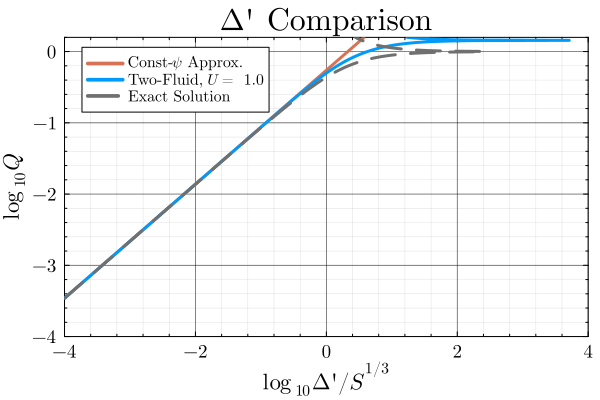

In [23]:
theme(:dao::Symbol)

plot(log10.([abs(deltaprimeTF(Q, 0)) for Q in Qvals]), logQ,
    line=(3,:solid),
    label=L"Const-$\psi$ Approx."
    )

idx = 500
U_str = @sprintf "%.1f" Uvals[idx]

plot!(Δ_TF[:,202], logQ,
    line=(3,:solid),
    label=L"Two-Fluid, $U=$ %$" * U_str,  # Concatenate the formatted string, 
    markersize=5
    )
plot!(Δ_Coppi, logQ, line=(3, :dash), 
    xlims=(-4,4),
    ylims=(-4, 0.2),
    label="Exact Solution",
    legend=:best,
    title=L"$\Delta '$ Comparison",
    xlabel=L"$\log_{10}\Delta'/S^{1/3}$",
    ylabel=L"$\log_{10}Q$",
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,
    bottom_margin = 2 * Plots.mm
    )

In [24]:
# Initialize animation
#=
anim = @animate for i in 1:length(Uvals)
    p = plot(log10.([abs(deltaprimeTF(Q, 0)) for Q in Qvals]), logQ,
        line=(3, :solid),
        label=L"SM, Const-$\psi$",
        dpi = 300
    )

    U_str = @sprintf "%.1f" Uvals[i]  # Format Uvals[i] as a string with 2 decimal places

    plot!(Δ_TF[:, i], logQ,
    line=(3, :solid),
    label=L"Two-Fluid, $U=$ %$" * U_str,  # Concatenate the formatted string
    dpi = 300
    )

    plot!(Δ_Coppi, logQ, line=(3, :dash), 
        xlims=(-4, 4),
        ylims=(-4, 0.2),
        label="SM, Exact",
        legend=:bottomright,
        title=L"$\Delta '$ Comparison (Constant-$\psi$)",
        xlabel=L"$\log_{10}\Delta'/S^{1/3}$",
        ylabel=L"$\log_{10}Q$",
        titlefontsize=20,
        tickfontsize=12,
        legendfontsize=10,
        yguidefontsize=15,
        xguidefontsize=15,
        bottom_margin = 2 * Plots.mm,
        dpi=300
    )
end  # End animation loop

# Save animation as MP4
mp4(anim, "delta_prime_comparison_cf.mp4", fps=30)
=#

In [31]:
ΔTF_nolog =     [abs(deltaprimeTF(Q, 0.5)) for Q in Qvals];

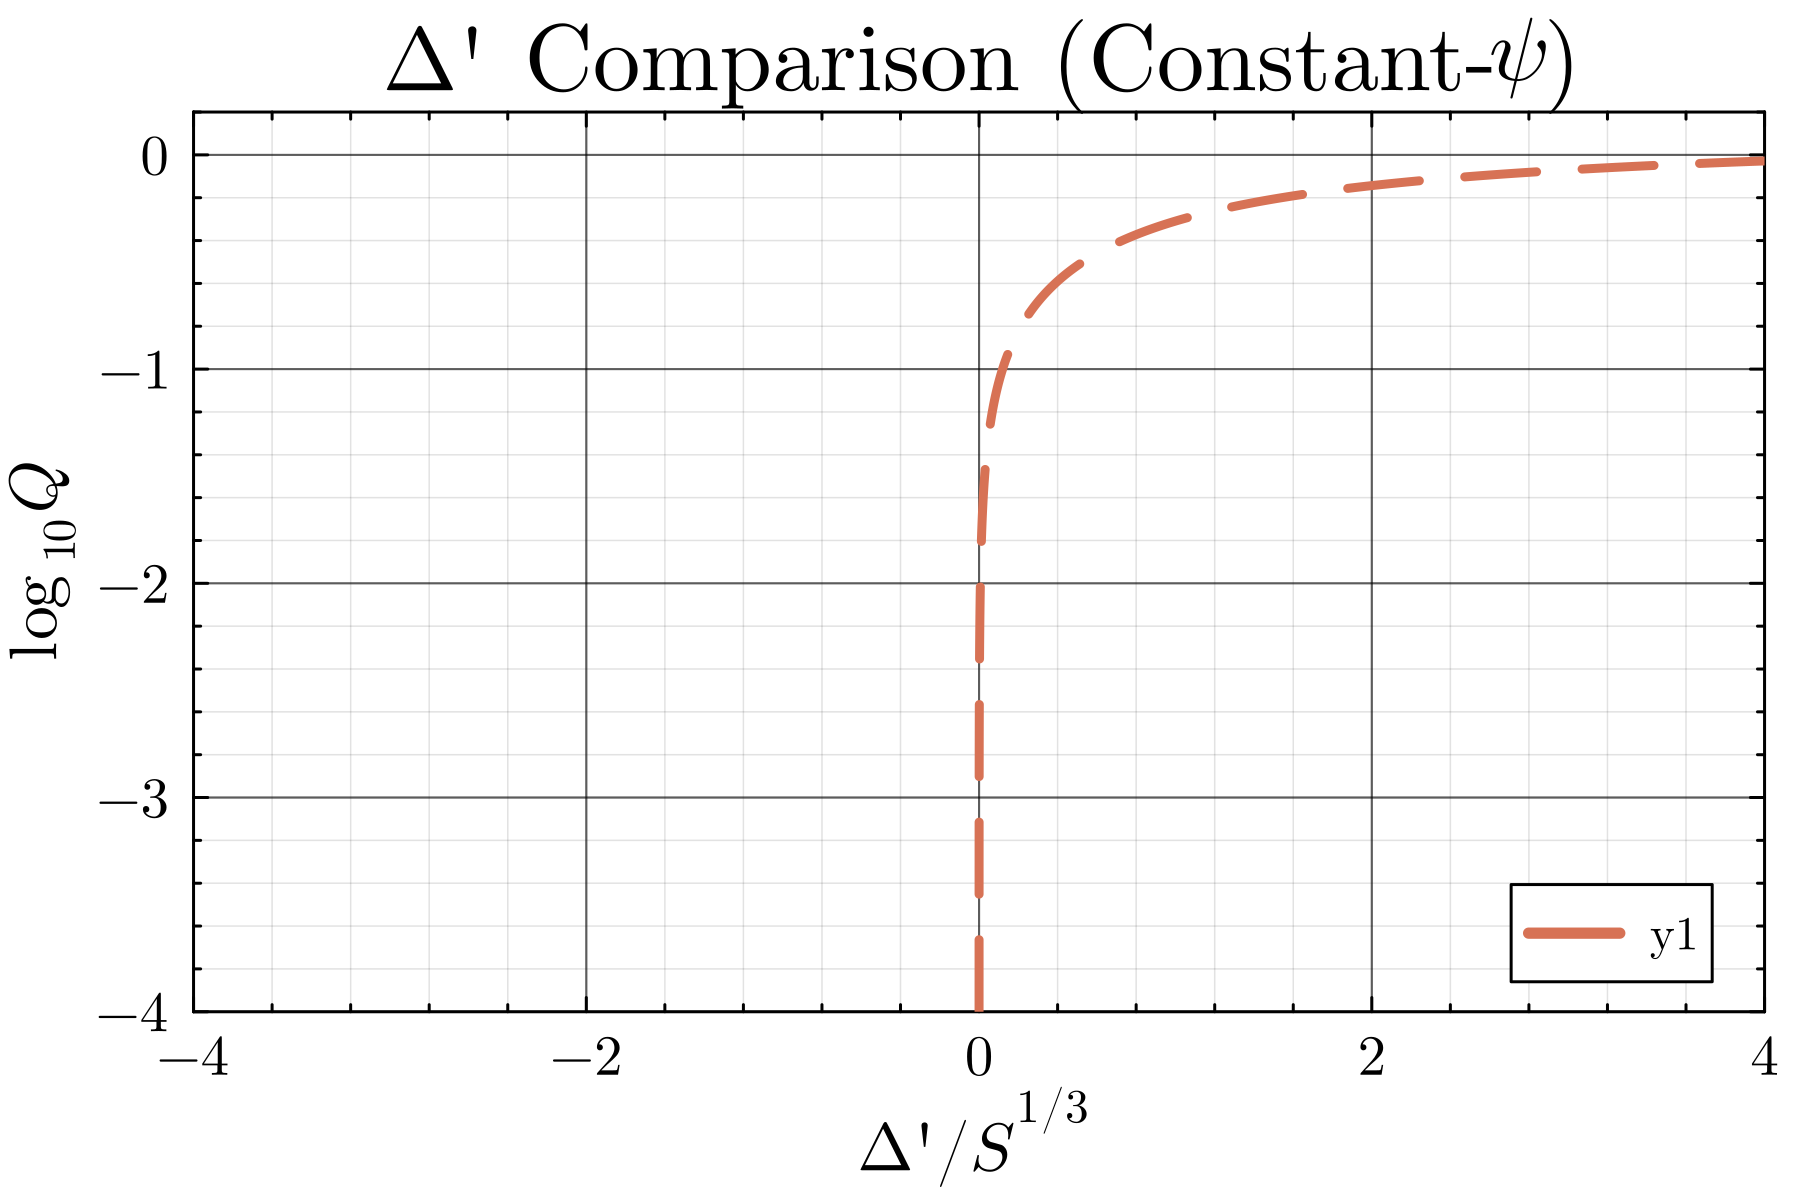

In [32]:
plot(ΔTF_nolog, logQ, 
    line=(3, :dash), 
    xlims=(-4, 4),
    ylims=(-4, 0.2),
    #label="SM, Exact",
    legend=:bottomright,
    title=L"$\Delta '$ Comparison (Constant-$\psi$)",
    xlabel=L"$\Delta'/S^{1/3}$",
    ylabel=L"$\log_{10}Q$",
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,
    bottom_margin = 2 * Plots.mm,
    dpi=300
    )